# Python for Data 24: Hypothesis Testing

<a id="toc"></a>

<h2 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h2>

<br><a href="#intro">Itroduction</a>
<br><a href="#testbasics">Hypothesis Testing Basics</a>
<br><a href="#ttest">T-test</a> 
<br>&nbsp;&nbsp;&nbsp;&nbsp;<a href="#1ttest">1. One sample t-test</a>
<br>&nbsp;&nbsp;&nbsp;&nbsp;<a href="#2ttest">2. Two Samples t-test</a>
<br>&nbsp;&nbsp;&nbsp;&nbsp;<a href="#paiedttest">3. Paired t-test</a>
<br><a href="#errors">Type-I and Type-II Errors</a> 
<br><a href="#href=">Statistical Power (1 - β)</a> 

# <a id="intro">Introduction</a>

Point estimates and confidence intervals are basic inference tools that act as the foundation for statistical hypothesis testing. 
#### Statistical hypothesis testing: 
hypothesis testing helps us evaluate whether our predictions align with the data we observe. Also it is a method of making inferences or decisions about a population parameter using data drawn from that population.

> Python's `scipy.stats` library contains an array of functions that make it easy to carry out hypothesis tests.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

np.random.seed(6)

In [2]:
%matplotlib inline
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.rcParams['figure.figsize'] = (7, 6)
colors = sns.cubehelix_palette(20,reverse = True, light= 0.01,dark = 0.5, gamma= 0.7)
# sns.set_context('talk')
sns.set(style="whitegrid")
sns.set_palette(palette= sns.color_palette("RdBu",20))

---
# <a id="testbasics">Hypothesis Testing Basics</a>
The purpose of a hypothesis test is to determine whether the null hypothesis is likely to be true given sample data and see if it supports the null hypothesis to a statistically significant degree. If very unlikely under $H_0$, we reject $H_0$ and conclude the alternative  $H_1$ is more plausible.

In simple terms, it involves:

**1) Stating two competing hypotheses about a population parameter (e.g. population mean).**
- **The null hypothesis ($H_0$)** - A statement of no effect or no difference.
- **The alternative hypothesis ($H_1$)** - The claim you want to establish.

**2) Choose a significance level (α).**
- Common value of α = 0.05, which means a 5% chance of making a Type I error (we will explain error types here ISA 😊)

**3) Determine critical value based on the significance level.
**4) Calculating a test statistic from the sample data and p-value.**
- **Test statistics** - is a numerical values calculated from sample data to help us make decisions about hypotheses.
- **P-value** - is a probability associated with the test statistic.

**5) Making a decision:**
- **Rejecting the Null Hypothesis ($H_0$)**: If test statistics > critical value or in other words p-value < α.
- **Failing to Reject the Null Hypothesis ($H_0$)**: If test statistics < critical value or in other words p-value > α.

<img src="https://media.licdn.com/dms/image/D4D12AQG_7QTqNgqhGw/article-cover_image-shrink_600_2000/0/1703252767783?e=2147483647&v=beta&t=97ndWb2Xs_kYxUJur8p87vAi_vlW0YfQ5SxdDoxeLVk">

<img src="https://www.automacaodedados.com.br/en/stories/estatistica-em-testes-para-nao-matematicos-parte-5/images/figure3-p-value-greater-than-alpha-en.webp" width=400>


---
# <a id="ttest">T-Test</a>

A t-test is a statistical hypothesis test that is used to determine if there is a significant difference between:
- The **means** of two groups.
- The sample mean $\bar{X}$ and population mean $\mu$. 

In simple terms, a t-test answers the following question:

**"Is the difference between the two sample means large enough to conclude that the population means are also different?"**

### T-tests make certain assumptions:

1. **Random Sampling**:  Both samples were obtained using random sampling to ensure representativeness.
2. **Independence**: The observations in sample1 are independent of the observations in the sample2.
      
      😊**How to Check**: Verify that each observation appears only once in each sample.

2. **Normality**: Both samples are approximately normally distributed.
         
      😊**How to Check**:
     - For small sample sizes (n < 50), use a **Shapiro-Wilk test**.
     - For large sample sizes, visually check using a **Q-Q plot** (data points along a straight diagonal line indicate normality).
3. **Homogeneity of Variances**: The two samples have roughly equal variances.
         
      😊**How to Check**: If the ratio of larger variance to smaller variance is less than 4, assume equal variances.
   
### There are different types of t-tests depending on the scenario, but the general idea is:

**1) Calculate the difference between the two sample means.**

**2) Calculate the standard error ($SE$) of the difference.**

**3) Divide the difference by the ($SE$) to get a t-statistic.** 

**4) Compare the t-statistic to a critical t-value from the t-distribution.**

**5) Making a decision:** reject or fail to reject the claim.

### Some common uses of t-tests:

- **One-sample t-test**: Comparing a sample mean to a hypothesized population mean.
- **Two-sample t-test**: Comparing the means of two independent groups (different categories in categorical random variable). 
- **Paired t-test**: Comparing two means that are paired or matched in some way.

---
## <a id="1ttest">1. One-Sample T-Test</a>

A one-sample t-test checks whether a sample mean differs from the population mean. 
#### Senario:
Let's create some dummy age data for the population of voters in the entire country and a sample of voters in Minnesota and test the whether the average age of voters Minnesota differs from the population:
#### Hypotheses:
- **Null Hypothesis ($H_0$)**: the average age of voters in Minnesota $\bar{X}$ is equal to the population average age $\mu$.
- **Alternate Hypothesis ($H_1$)**: the average age of voters in Minnesota $\bar{X}$ is differ from the population average age $\mu$.

#### Test Statistic:
$$SE=\frac{s}{\sqrt{n}}$$
$$t = \frac{\bar{X} - \mu}{SE}$$
- $\bar{X}$ is the sample mean,
- $\mu$ is the population mean,
- $s$ is the sample standard deviation, and
- $n$ is the sample size.

### Generate popuation data 

In [3]:
np.random.seed(6)

pop_ages_group1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
pop_ages_group2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population = np.concatenate((pop_ages_group1, pop_ages_group2))
population_mean = population.mean()
population_mean

43.000112

### Generate sample data 

In [4]:
minnesota_ages_group1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages_group2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_sample = np.concatenate((minnesota_ages_group1, minnesota_ages_group2))
minnesota_sample_mean = minnesota_sample.mean()
minnesota_sample_mean

39.26

### Conduct one sample t-test
- Confidence level is 95%.
- α = 0.05. probability = 0.025 from both sides (tail).
- To conduct a one sample t-test, we can the `stats.ttest_1samp()`.

In [5]:
alpha = 0.05
t_critical_left = stats.t.ppf(q=0.025, df=49)
t_critical_right = stats.t.ppf(q=0.975, df=49)
t_critical_left, t_critical_right

(-2.0095752344892093, 2.009575234489209)

📌 The critical value = -2 for the left-tail significance level of (α/2) 0.025.

📌 The critical value = +2 for the right-tail significance level of (α/2) 0.025.

In [6]:
t_statistic, p_value = stats.ttest_1samp(a=minnesota_sample, popmean=population_mean, )
t_statistic, p_value

print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < alpha/2:
    print("Reject the null hypothesis (sample mean is different from population mean).")
else:
    print("Fail to reject the null hypothesis (sample mean is equal to population mean).")

t-statistic: -2.5743
p-value: 0.0131
Reject the null hypothesis (sample mean is different from population mean).


📌 Test statistic = -2.5743 < critical value (-2.0095). 

📌 P value = 0.0131 < α/2 (0.025): rejection area نسبة رفضي للاتش نود وهو اصلا صح هي الالفا.

📌 A p-value of 0.01311 means we'd expect to see data as extreme as our sample due to chance about 1.3% of the time if the null hypothesis was true. 

📌 Sample mean is different from population mean.

We can calculate the p-value by passing the t-statistic in as the quantile to the `stats.t.cdf()` function.

In [7]:
stats.t.cdf(x= t_statistic, df= 49)*2   # Multiply by two for two tailed test *

0.013118685425061678

### Confidance interval

In [8]:
std_error = minnesota_sample.std()/math.sqrt(50)  # Sample stdev/sample size

ci = stats.t.interval(0.95,                   # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_sample_mean,           # Sample mean
                 scale= std_error)            # Standard dev estimate

print("Confidance Interval : ", ci)

Confidance Interval :  (36.369669080722176, 42.15033091927782)


In [9]:
ci = stats.t.interval(0.99,                   # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_sample_mean,           # Sample mean
                 scale= std_error)            # Standard dev estimate

print("Confidance Interval : ", ci)

Confidance Interval :  (35.40547994092107, 43.11452005907893)


📌 With a higher confidence level, we construct a wider confidence interval and increase the chances that it captures to true mean.

📌 Less likely that we'll reject the null hypothesis. In this case, the p-value of 0.013 is greater than our significance level of 0.01 and we fail to reject the null hypothesis.

---
## <a id="2ttest">2. Two-Sample T-Test</a>

A two-sample t-test investigates whether the means of two independent data samples differ from one another.

#### Senario:
Let's generate another sample of voter age data for Wisconsin and test it against the sample we made earlier:

#### Hypotheses:
- **Null Hypothesis ($H_0$)**: the means of both groups are the same.
- **Alternate Hypothesis ($H_1$)**: the means of both groups are the different.

#### Test Statistic:
$$SE = \sqrt{\frac{{s_1^2}}{{n_1}} + \frac{{s_2^2}}{{n_2}}}$$


$$t = \frac{\bar{X_1} - \bar{X_2}}{SE}$$

### Generate sample2 data 

In [10]:
np.random.seed(12)

wisconsin_ages_group1 = stats.poisson.rvs(loc=18, mu=33, size=30)
wisconsin_ages_group2 = stats.poisson.rvs(loc=18, mu=13, size=20)
wisconsin_sample = np.concatenate((wisconsin_ages_group1, wisconsin_ages_group2))
wisconsin_sample_mean = wisconsin_sample.mean()
wisconsin_sample_mean

42.8

### Conduct one sample t-test
- Confidence level is 95%.
- α = 0.05. probability = 0.025 from both sides (tail).
- To conduct a one sample t-test, we can the `stats.ttest_ind()`.

In [11]:
t_statistic, p_value = stats.ttest_ind(minnesota_sample, wisconsin_sample, equal_var=False)
t_statistic, p_value

print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < alpha/2:
    print("Reject the null hypothesis (the two samples means don't have significant difference).")
else:
    print("Fail to reject the null hypothesis (the two samples means have significant difference).")

t-statistic: -1.7084
p-value: 0.0907
Fail to reject the null hypothesis (the two samples means have significant difference).


📌 p-value of 0.0907 means that there is a 9% chance we'd see sample data far apart if the two groups tested are actually identical. 

---
## <a id="paiedttest">3.  Paired T-Test</a>
A paired t-test lets you check whether the means of samples from the same group differ at different points in time.

#### Senario:
A hospital might want to test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment. 

#### Hypotheses:
- **Null Hypothesis ($H_0$)**: no significant difference in weight due to treatment.
- **Alternate Hypothesis ($H_1$)**: there is a significant difference in weight before and after treatment.

#### Test Statistic:
$$s_{\text{diff}} = \sqrt{\frac{\sum_{i=1}^{n} (X_{\text{before},i} - X_{\text{after},i})^2}{n-1}}$$
$$ SE = \frac{s_{\text{diff}}}{\sqrt{n}}$$
$$t = \frac{\bar{X}{\text{before}} - \bar{X}{\text{after}}}{SE}$$

We can conduct a paired t-test using the scipy function `stats.ttest_rel()`.

### Generate Data 
Let's generate some dummy patient weight data and do a paired t-test:

In [12]:
np.random.seed(11)
before = stats.norm.rvs(scale=30, loc=250, size=100)
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)
weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})
weight_df.describe()

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


📌 The summary shows that patients lost about 1.23 pounds on average after treatment. Let's conduct a paired t-test to see whether this difference is significant at a 95% confidence level:

In [13]:
t_statistic, p_value = stats.ttest_rel(a=before, b=after)
t_statistic, p_value

print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis (there is a significant difference in weight before and after treatment).")
else:
    print("Fail to reject the null hypothesis (there is NO significant difference in weight due to treatment).")

t-statistic: 2.5720
p-value: 0.0116
Reject the null hypothesis (there is a significant difference in weight before and after treatment).


---
# <br><a id="errors">Type I and Type II Error</a> 

The result of a statistical hypothesis test and the corresponding decision of whether to reject or accept the null hypothesis is not infallible. 


<img src="https://www.scribbr.com/wp-content/uploads/2021/01/type-i-and-ii-error-2.png" width = 600>


### Type I error:
It describes a situation where you **wrongly reject** the null hypothesis (it is actually true). 
- Also known as a "false positive" or "false hit". 
- The type 1 error rate is equal to the significance level α
- Setting a higher confidence level -> lower alpha, this reduces the chances of getting a false positive.

### Type II error:
It describes a situation where you **wrongly fail** to reject the null hypothesis (it is actually false). 
- Also known as a "false negative" or "miss". 
- The lower your confidence level  -> higher alpha -> low beta, this reduces the chances of getting a false negative.

<img src="https://static.wingify.com/gcp/uploads/sites/3/2020/12/graphical-representation-of-type-1-and-type-2-errors.png" width=400>

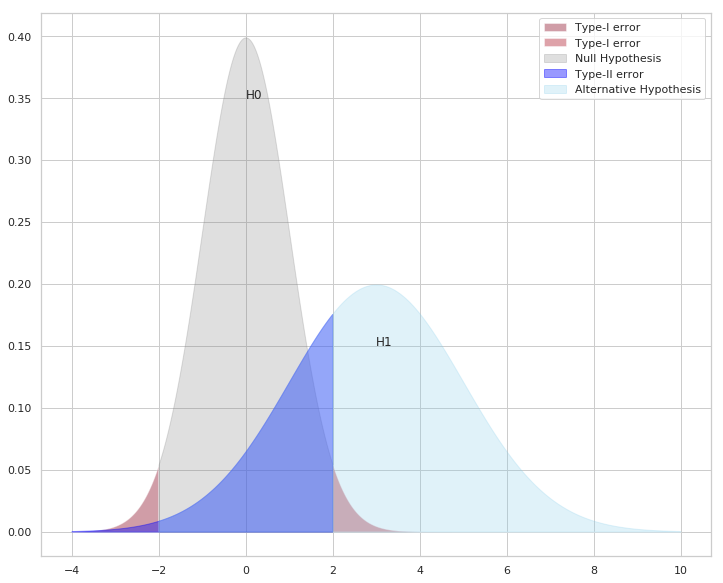

In [14]:
plt.figure(figsize=(12,10))

# Plot HO distribution (standard normal with mu=0, std=1

plt.fill_between(x = np.arange(-4,-2,0.01),
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=0, scale=1) ,
                 alpha=0.4,
                 label='Type-I error')

plt.fill_between(x = np.arange(2,10,0.01),
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=0, scale=1) ,
                 alpha=0.4,
                 label='Type-I error')

plt.fill_between(x = np.arange(-2,2,0.01),
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=0, scale=1) ,
                 color='gray',
                 alpha=0.25,
                 label='Null Hypothesis')

# Plot H1 distribution (normal with mu=3, std=2)

plt.fill_between(x = np.arange(-4,2,0.01),
                 y1= stats.norm.pdf(np.arange(-4,2,0.01),loc=3, scale=2) ,
                 color='blue',
                 alpha=0.4, 
                label='Type-II error')

plt.fill_between(x = np.arange(2,10,0.01),
                 y1= stats.norm.pdf(np.arange(2, 10 ,0.01),loc=3, scale=2) ,
                 color='skyblue',
                 alpha=0.25,
                 label='Alternative Hypothesis')

plt.fill_between(x = np.arange(-2,2,0.01),
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 color='skyblue',
                 alpha=0.25)

plt.text(x=0, y=0.35, s= "H0")
plt.text(x=3, y=0.15, s= "H1")
# plt.text(x=2.1, y=0.01, s= "Type 1 Error")
# plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
# plt.text(x=0, y=0.02, s= "Type 2 Error")

plt.legend()

In [15]:
lower_quantile = stats.norm.ppf(0.025)  # Lower cutoff value
upper_quantile = stats.norm.ppf(0.975)  # Upper cutoff value

# Area under alternative, to the left the lower cutoff value
low = stats.norm.cdf(lower_quantile,    
                     loc=3,             
                     scale=2)
print(low)
# Area under alternative, to the left the upper cutoff value
high = stats.norm.cdf(upper_quantile, 
                      loc=3, 
                      scale=2)          
print(high)
# Area under the alternative, between the cutoffs (Type II error)
print(high-low)

0.006569450904958285
0.3015255120172813
0.294956061112323


📌 With the normal distributions above, we'd fail to reject the null hypothesis about 30% of the time because the distributions are close enough together that they have significant overlap.

---
# <br><a id="statspower">Statistical Power (1 - β)</a> 

The power statistics represents the ability of a statistical test to correctly reject the null hypothesis when the alternative hypothesis is true. It helps us avoid Type II errors. The power of a statistical test is influenced by:

1. **Significance level** is chosen for the test.
2. **Sample size**: A larger sample size -> reduces the uncertainty ->reduce the sample distribution -> reduce type II error r-> increase power statistics.
3. **Effect Size**: The standardized difference between sample means.

### Trade-off between type I and type II error:
- A low significance level α, such as 0.01 makes a test unlikely to have type I errors (false positives), but more likely to have type II errors (false negatives).
- A larger value of the significance level α. A common convention is that a statistical tests should have a power of at least 0.8.


### Example:
If you want to conduct a test with a given significance level (say 0.05) and power (say 0.8) and you are interested in a given effect size (say 0.5 for standardized difference between sample means), you could use that information to determine how large of a sample size you need.

- Since statistical power, the significance level, the effect size and the sample size are related, it is possible to calculate any one of them for given values of the other three. 

$$n = \frac{{(Z_{1-\frac{\alpha}{2}} + Z_{1-\beta})^2 \cdot 2 \cdot \sigma2}}{{d2}}$$

- $n$ is the required sample size.
- $Z_{1-\frac{\alpha}{2}}$ is the critical value for the upper tail of the standard normal distribution at significance level (\alpha).
- $Z_{1-\beta}$ is the critical value for the standard normal distribution at power level (\beta).
- $\sigma$ is the estimated population standard deviation (if known).
- $d$ is the effect size.

Use `statsmodels.stats.power.tt_solve_power` for one sample t-tests and `statsmodels.stats.power.tt_ind_solve_power` for a two sample t-test. 


In [16]:
from statsmodels.stats.power import tt_solve_power

tt_solve_power(effect_size = 0.5,alpha = 0.05, power = 0.8)

33.3671314275208

📌In this case, we would want a sample size of at least 34 to make a study with the desired power and signifiance level capable of detecting a large effect size.

### Wrap up 
The t-test is a powerful tool for investigating the differences between sample and population means. T-tests operate on numeric variables; in the next lesson, we'll discuss statistical tests for categorical variables.

### Resources: 
- https://www.youtube.com/watch?v=Rsc5znwR5FA